In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DATASETS/Cirrhosis.csv')

In [ ]:
data.shape

(312, 20)

In [ ]:
data.dtypes

,0
index,int64
duration,int64
status,int64
drug,int64
age,int64
sex,int64
ascites,int64
hepatomology,int64
spiders,int64
edema,float64


In [ ]:
data

,index,duration,status,drug,age,sex,ascites,hepatomology,spiders,edema,bilirubin,cholesterol,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,stage
0,1,400,2,1,21464,1,1,1,1,1.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,2,4500,0,1,20617,1,0,1,1,0.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,3,1012,2,1,25594,0,0,0,0,0.5,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,4,1925,2,1,19994,1,0,1,1,0.5,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,5,1504,1,2,13918,1,0,1,1,0.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,0,1,22347,1,0,1,0,0.0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2
308,309,994,0,2,21294,1,0,0,0,0.0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2
309,310,939,0,1,22767,1,0,0,0,0.0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2
310,311,839,0,1,13879,1,0,0,0,0.0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2


In [ ]:
df = pd.DataFrame(data)

<Axes: >

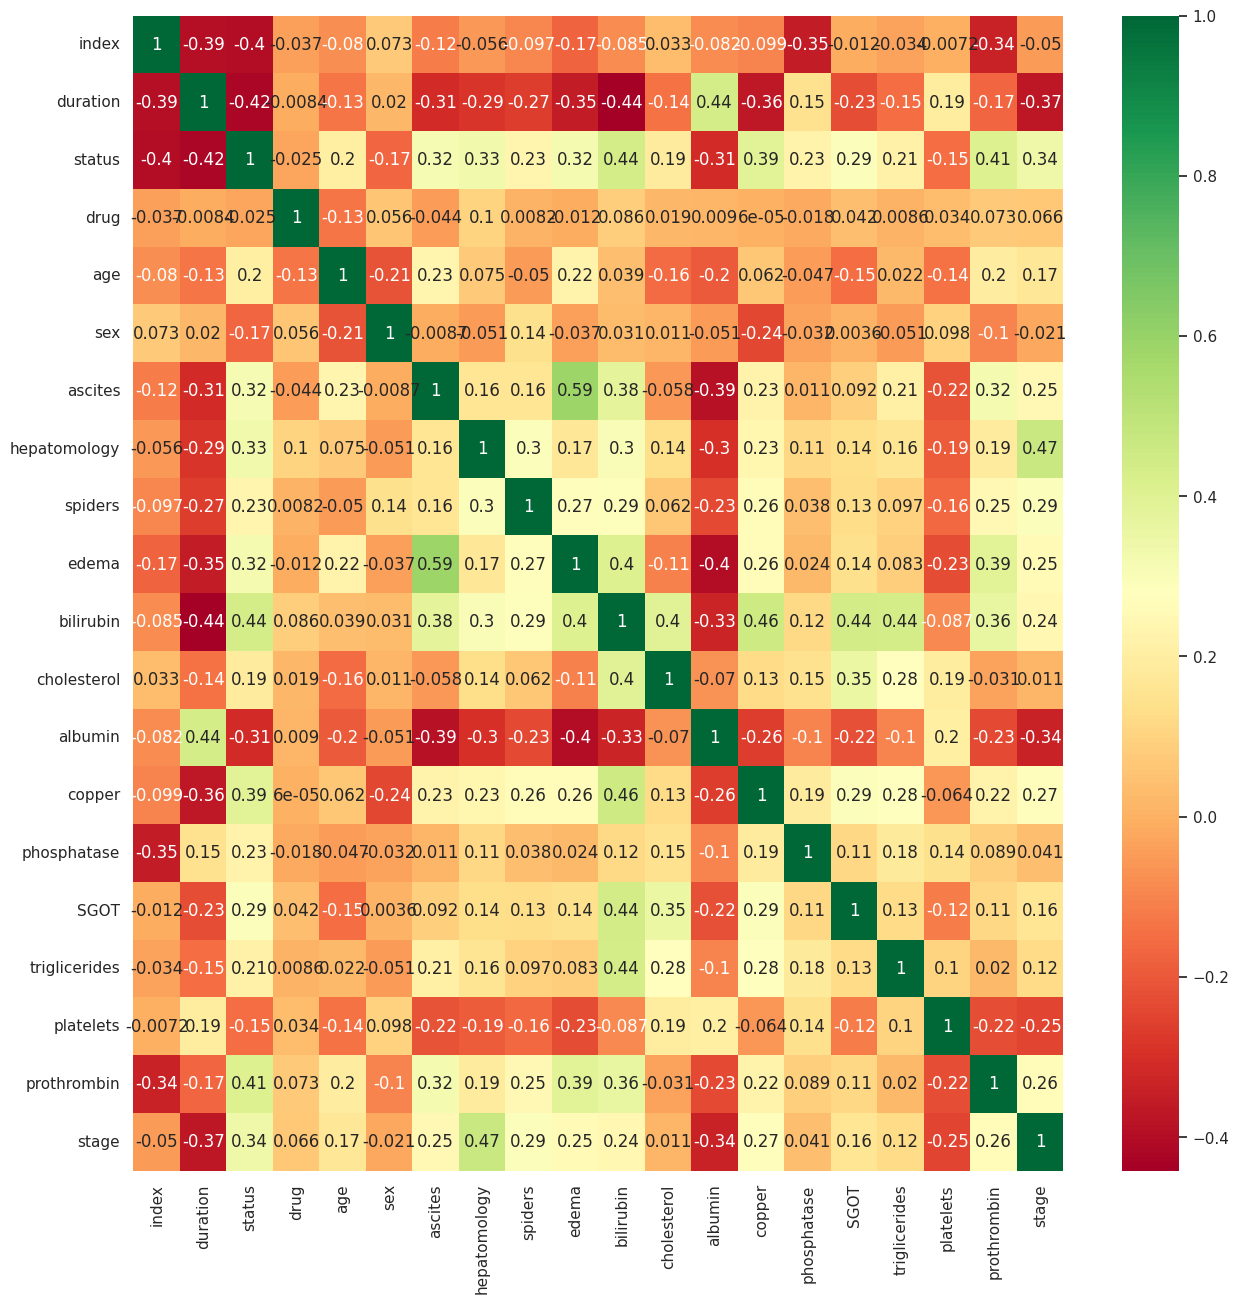

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(15,15))
#plot heat map
sns.heatmap(correlation_matrix, annot=True, cmap=
                                        "RdYlGn"
                                        #"inferno"
                                        #"cividis"
                                        #"bwr"
                                               )

In [ ]:
#data =data.dropna(subset = ['triglicerides', 'cholesterol', 'platelets', 'copper'])

In [ ]:
impute_cols = ['triglicerides', 'cholesterol', 'platelets', 'copper']

for col in impute_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

nulls_after = df.isnull().sum()

nulls_after[nulls_after > 0]

,0


In [ ]:
df

,index,duration,status,drug,age,sex,ascites,hepatomology,spiders,edema,bilirubin,cholesterol,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,stage
0,1,400,2,1,21464,1,1,1,1,1.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,2,4500,0,1,20617,1,0,1,1,0.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,3,1012,2,1,25594,0,0,0,0,0.5,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,4,1925,2,1,19994,1,0,1,1,0.5,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,5,1504,1,2,13918,1,0,1,1,0.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,0,1,22347,1,0,1,0,0.0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2
308,309,994,0,2,21294,1,0,0,0,0.0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2
309,310,939,0,1,22767,1,0,0,0,0.0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2
310,311,839,0,1,13879,1,0,0,0,0.0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2


In [ ]:
df.iloc[215]

,215
index,216.00
duration,2168.00
status,0.00
drug,1.00
age,21610.00
sex,1.00
ascites,0.00
hepatomology,0.00
spiders,0.00
edema,0.00


In [ ]:
df['age'] = df['age'] / 365

In [ ]:
features = ['age','ascites',	'hepatomology',	'spiders',	'edema',	'bilirubin',	'albumin',	'copper',	'phosphatase',	'SGOT',	'triglicerides','platelets',	'prothrombin','cholesterol']
X = df[features].values
y = df['stage'].values
index = int(0.8 * len(X))
X_train, X_test = X[:index], X[index:]
y_train, y_test = y[:index], y[index:]


In [ ]:
df.iloc[215]

,215
index,216.000000
duration,2168.000000
status,0.000000
drug,1.000000
age,59.205479
sex,1.000000
ascites,0.000000
hepatomology,0.000000
spiders,0.000000
edema,0.000000


In [ ]:
y_test.shape

(63,)

In [ ]:
X_temp = pd.DataFrame(X, columns=features)
X_temp

,age,ascites,hepatomology,spiders,edema,bilirubin,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,cholesterol
0,58.805479,1.0,1.0,1.0,1.0,14.5,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,261.0
1,56.484932,0.0,1.0,1.0,0.0,1.1,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,302.0
2,70.120548,0.0,0.0,0.0,0.5,1.4,3.48,210.0,516.0,96.10,55.0,151.0,12.0,176.0
3,54.778082,0.0,1.0,1.0,0.5,1.8,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,244.0
4,38.131507,0.0,1.0,1.0,0.0,3.4,3.53,143.0,671.0,113.15,72.0,136.0,10.9,279.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,61.224658,0.0,1.0,0.0,0.0,0.4,3.58,24.0,797.0,91.00,113.0,288.0,10.4,246.0
308,58.339726,0.0,0.0,0.0,0.0,0.4,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,260.0
309,62.375342,0.0,0.0,0.0,0.0,1.7,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,434.0
310,38.024658,0.0,0.0,0.0,0.0,2.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,247.0


In [ ]:
df

,index,duration,status,drug,age,sex,ascites,hepatomology,spiders,edema,bilirubin,cholesterol,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,stage
0,1,400,2,1,58.805479,1,1,1,1,1.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,2,4500,0,1,56.484932,1,0,1,1,0.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,3,1012,2,1,70.120548,0,0,0,0,0.5,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,4,1925,2,1,54.778082,1,0,1,1,0.5,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,5,1504,1,2,38.131507,1,0,1,1,0.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,0,1,61.224658,1,0,1,0,0.0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2
308,309,994,0,2,58.339726,1,0,0,0,0.0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2
309,310,939,0,1,62.375342,1,0,0,0,0.0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2
310,311,839,0,1,38.024658,1,0,0,0,0.0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2


In [ ]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(["#FF0000","#00FF00","#0000FF"])
cmap_light = ListedColormap(["#FFBBBB","#BBFFBB","#BBBBFF"])


In [ ]:
# Activation Functions
def linear(H):
  return H
def sigmoid(H):
  return 1/(1+np.exp(-H))
def ReLU(H):
  return H*(H>0)
def softmax(H):
  eH = np.exp(H)
  return eH/eH.sum(axis=1, keepdims=True)

# Loss Functions

def cross_entropy(Y,P_hat):
  return -(1/len(Y))*np.sum(Y*np.log(P_hat))

def OLS(Y, Y_hat):
  return (1/(2*len(Y)))*np.sum((Y-Y_hat)**2)

#Misc

def one_hot(y):
  N=len(y)
  K=len(set(y))+1
  Y=np.zeros((N,K))
  for i in range(N):
    Y[i,y[i]]=1
  return Y

def accuracy(y, y_hat):
  return np.mean(y==y_hat)

def R2(y,y_hat):
  return 1-np.sum((y-y_hat)**2)/np.sum((y-y.mean())**2)

In [ ]:
def derivative(Z,a):
  if a==linear:
    return 1
  elif a==sigmoid:
    return Z*(1-Z)
  elif a==np.tanh:
    return 1-Z*Z
  elif a==ReLU:
    return (Z>0).astype(int)
  else:
    ValueError("Unknown Activation")

In [ ]:
class ANN():
  def __init__(self, architecture, activations=None, mode=0):
    self.mode=mode
    self.architecture=architecture
    self.activations = activations
    self.L = len(architecture)+1

  def fit (self, X, y, eta=1e-3, epochs=1e3, show_curve=True):
    epochs = int(epochs)

    if self.mode:
      Y=y
      K=1
    else:
      Y=one_hot(y)
      K=Y.shape[1]

    N, D = X.shape
    # Initialize Weights and Biases
    self.W = {l: np.random.randn(M[0],M[1]) for l, M in enumerate(zip(([D]+self.architecture), (self.architecture +[K])),1)}
    self.B = {l: np.random.randn(M) for l, M in enumerate(self.architecture+[K],1)}


    #Activations
    if self.activations is None:
      self.a= {l: ReLU for l in range(1, self.L)}
    else:
      self.a={l: act for l,act in enumerate(self.activations, 1)}

    #Output Activation Functions
    if self.mode:
      self.a[self.L]=linear
    else:
      self.a[self.L]=softmax

    J = np.zeros(epochs)

    #SGD Progression
    for epoch in range(epochs):
      self.__forward__(X)
      if self.mode:
        J[epoch]=OLS(Y, self.Z[self.L])
      else:
        J[epoch]=cross_entropy(Y, self.Z[self.L])

      dH = (1/N)*(self.Z[self.L]-Y)

      for l in sorted(self.W.keys(), reverse=True):

        dW = self.Z[l-1].T@dH
        dB = dH.sum(axis=0)

        self.W[l] -= eta*dW
        self.B[l] -= eta*dB

        if l>1:
          dZ =dH@self.W[l].T
          dH = dZ*derivative(self.Z[l-1], self.a[l-1])

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def __forward__(self,X):
    self.Z={0:X}
    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.B[l])


  def predict(self, X):
    self.__forward__(X)
    if self.mode:
      return self.Z[self.L]
    else:
      return self.Z[self.L].argmax(axis=1)

In [ ]:
X_train

array([[5.88054795e+01, 1.00000000e+00, 1.00000000e+00, ...,
        1.90000000e+02, 1.22000000e+01, 2.61000000e+02],
       [5.64849315e+01, 0.00000000e+00, 1.00000000e+00, ...,
        2.21000000e+02, 1.06000000e+01, 3.02000000e+02],
       [7.01205479e+01, 0.00000000e+00, 0.00000000e+00, ...,
        1.51000000e+02, 1.20000000e+01, 1.76000000e+02],
       ...,
       [4.12493151e+01, 0.00000000e+00, 1.00000000e+00, ...,
        2.97000000e+02, 1.00000000e+01, 1.71200000e+03],
       [5.54547945e+01, 0.00000000e+00, 1.00000000e+00, ...,
        3.71000000e+02, 1.00000000e+01, 3.24000000e+02],
       [4.80136986e+01, 0.00000000e+00, 0.00000000e+00, ...,
        1.95000000e+02, 1.06000000e+01, 2.42000000e+02]])

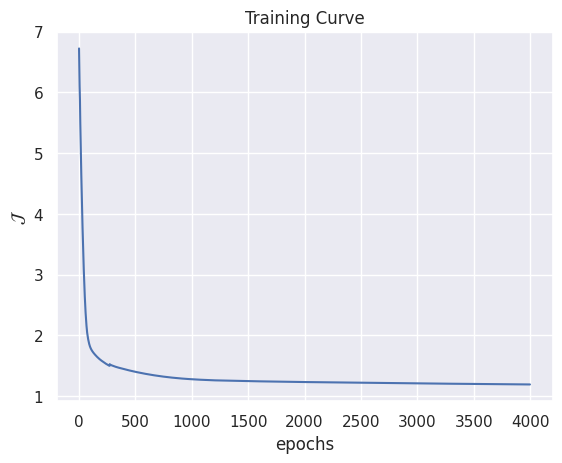

In [ ]:
ann_f = ANN(architecture=[16, 8], activations=[np.tanh, ReLU,ReLU])
ann_f.fit(X_train, y_train, eta=2e-3, epochs= 4000)

In [ ]:
  # Predict
y_train_pred = ann_f.predict(X_train)
y_test_pred = ann_f.predict(X_test)

In [ ]:
# Accuracy
acc_train= accuracy(y_train, y_train_pred)
acc_test = accuracy(y_test, y_test_pred)
acc_train

np.float64(0.41767068273092367)

In [ ]:
acc_test

np.float64(0.3968253968253968)

In [237]:
def get_scores(y_true, y_pred):
    classes = set(y_true)
    total_prec, total_rec, total_f1 = 0, 0, 0
    n_classes = len(classes)

    for cls in classes:
        tp = sum((y_true[i] == cls) and (y_pred[i] == cls) for i in range(len(y_true)))
        fp = sum((y_true[i] != cls) and (y_pred[i] == cls) for i in range(len(y_true)))
        fn = sum((y_true[i] == cls) and (y_pred[i] != cls) for i in range(len(y_true)))

        prec = tp / (tp + fp) if (tp + fp) else 0
        rec = tp / (tp + fn) if (tp + fn) else 0
        f1 = 2 * prec * rec / (prec + rec) if (prec + rec) else 0

        total_prec += prec
        total_rec += rec
        total_f1 += f1

    print("Precision:", round(total_prec / n_classes, 2))
    #print("Recall   :", round(total_rec / n_classes, 2))
    #print("F1 Score :", round(total_f1 / n_classes, 2))


In [239]:
y_pred_train = ann_f.predict(X_train)
y_pred_test = ann_f.predict(X_test)

print("Train Scores:")
get_scores(y_train, y_pred_train)

print("\nTest Scores:")
get_scores(y_test, y_pred_test)


Train Scores:
Precision: 0.45

Test Scores:
Precision: 0.4


Text(0.5, 43.249999999999986, 'Predicted label')

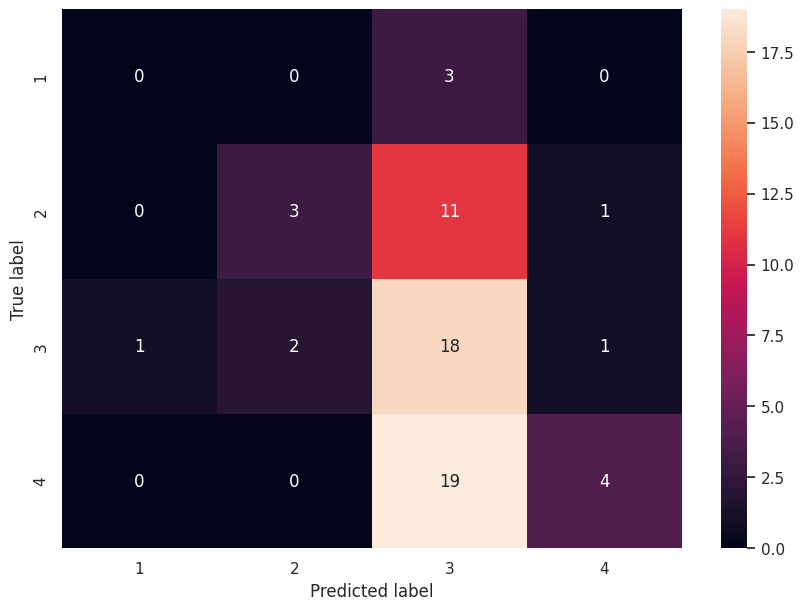

In [240]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred_test, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5, 43.249999999999986, 'Predicted label')

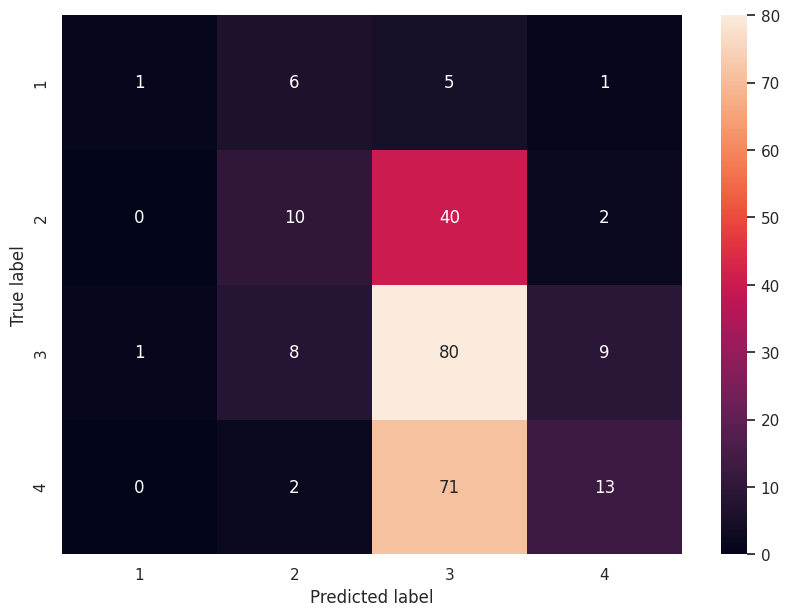

In [241]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_train, name='Actual')
y_pred = pd.Series(y_pred_train, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')